# Clustering

A partire dal dataset ridotto con la tecnica del k-means, applichiamo gli altri due principali metodi di clustering: gerarchico e DB Scan.

In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import euclidean, jaccard
from sklearn.cluster import DBSCAN

### Hierarchical

Droppiamo le variabili innestate per creare meno problemi al clusterizzatore.

In [45]:
df = pd.read_csv('D:\\MasterBigData\\Didattica\\DMML\\Project\\training_clustered.csv')
df.drop(['Auction','Make_new','Model_Name', 'VNST_new','Model_Property'], axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IsBadBuy      2000 non-null   float64
 1   VehicleAge    2000 non-null   float64
 2   VehOdo        2000 non-null   float64
 3   VehBCost      2000 non-null   float64
 4   WarrantyCost  2000 non-null   float64
 5   AverageMMR    2000 non-null   float64
 6   Size_class    2000 non-null   float64
 7   WheelType     2000 non-null   object 
 8   Nationality   2000 non-null   object 
 9   SubModel_New  2000 non-null   object 
 10  Trim_New      2000 non-null   object 
dtypes: float64(7), object(4)
memory usage: 172.0+ KB


In [47]:
c = pd.get_dummies(df[[c for c in df.columns if c != 'IsBadBuy']], prefix_sep='=')
c

,VehicleAge,VehOdo,VehBCost,WarrantyCost,AverageMMR,Size_class,WheelType=Alloy,WheelType=Covers,Nationality=AMERICAN,Nationality=OTHER,...,Trim_New=S,Trim_New=SE,Trim_New=SR,Trim_New=SS,Trim_New=ST,Trim_New=SX,Trim_New=T,Trim_New=X,Trim_New=ZX,Trim_New=i
0,5.0,80436.185714,4370.571429,999.900000,4040.810714,1.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,6.0,77877.800000,6603.666667,1006.866667,6305.958333,6.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,45059.402778,7084.861111,881.069444,8373.621528,1.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,68876.378151,6979.592437,836.050420,9033.485294,1.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,77955.000000,7081.153846,688.538462,8326.615385,6.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.0,59890.500000,7122.142857,670.000000,7381.571429,5.0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1996,5.0,62435.958333,8278.333333,1152.062500,9004.718750,6.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1997,7.2,51376.600000,7596.000000,1013.800000,7289.750000,5.0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1998,4.0,80478.095238,8725.952381,1229.119048,11218.916667,6.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
def mixed(u, v):
    index = 6
    de = euclidean(u[:index], v[:index])
    dj = jaccard(u[index:], v[index:])
    #d = index/len(u) * de + (len(u)-index)/len(u) * dj
    d = 0.5 * de + 0.5 * dj
    return d

In [51]:
X = c.values
scaler = StandardScaler()
X[:6] = scaler.fit_transform(X[:6])
X.shape

(2000, 45)

In [52]:
data_dist = pdist(X, mixed)
data_dist

array([1.66796230e+00, 2.43093059e+00, 1.92055857e+00, ...,
       1.46943673e+04, 2.55821037e+03, 1.35142225e+04])

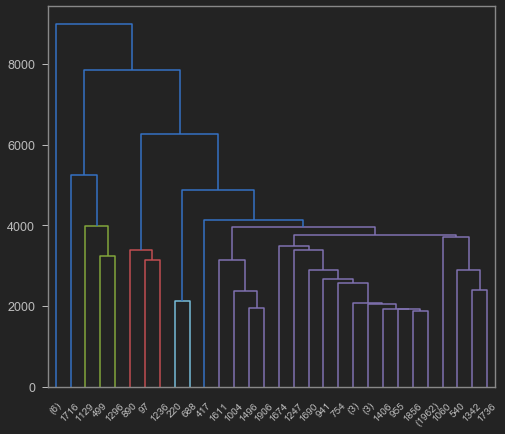

In [70]:
single_link = linkage(data_dist, method='single')
res = dendrogram(single_link, color_threshold=4000, truncate_mode='lastp')

In [71]:
labels_single = fcluster(single_link, t=4000, criterion='distance')
print('Silhouette %s' % silhouette_score(X, labels_single))

Silhouette 0.35753783006497636


In [72]:
np.unique(labels_single, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([   6,    3,    1,    3,    2, 1984,    1], dtype=int64))

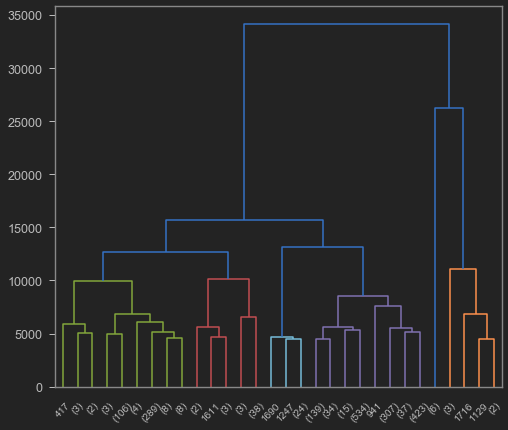

In [56]:
average_link = linkage(data_dist, method='average')
res = dendrogram(average_link, color_threshold=12000, truncate_mode='lastp')

In [57]:
labels_average = fcluster(average_link, t=12000, criterion='distance')
print('Silhouette %s' % silhouette_score(X, labels_average))

Silhouette 0.34958181174432473


In [58]:
np.unique(labels_average, return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=int32),
 array([ 424,   47,   26, 1490,    6,    7], dtype=int64))

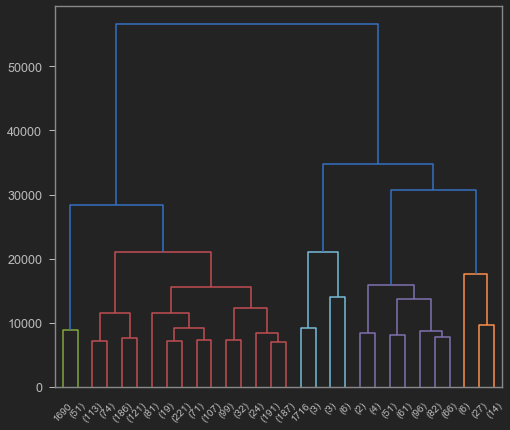

In [59]:
complete_link = linkage(data_dist, method='complete')
res = dendrogram(complete_link, color_threshold=25000, truncate_mode='lastp')

In [60]:
labels_complete= fcluster(complete_link, t=25000, criterion='distance')
print('Silhouette %s' % silhouette_score(X, labels_complete))

Silhouette 0.29633817202664897


In [73]:
cu = np.unique(labels_complete, return_counts=True)
np.unique(labels_complete, return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int32),
 array([  52, 1526,   13,  362,   47], dtype=int64))

In [62]:
d ={'Cluster': cu[0], 'Dim':cu[1]}
d

{'Cluster': array([1, 2, 3, 4, 5, 6], dtype=int32),
 'Dim': array([ 424,   47,   26, 1490,    6,    7], dtype=int64)}

In [63]:
dim = pd.DataFrame(d)

In [64]:
labels_average

array([5, 5, 5, ..., 1, 4, 1], dtype=int32)

In [65]:
df['Label'] = labels_average

In [66]:
q = df.groupby("Label").mean()
c = df.groupby(['Label']).agg(lambda x:x.value_counts().index[0])
c

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost,AverageMMR,Size_class,WheelType,Nationality,SubModel_New,Trim_New
Label,,,,,,,,,,,
1,0.000000,3.0,52410.268657,5707.500000,3676.000000,0.000000,1.0,Covers,AMERICAN,SEDAN,Bas
2,0.000000,2.0,30448.444444,5561.111111,822.000000,12036.111111,1.0,Covers,AMERICAN,SEDAN,Bas
3,0.500000,8.0,105436.000000,3445.833333,1161.833333,4635.833333,1.0,Alloy,AMERICAN,SEDAN,SE
4,0.000000,4.0,76265.588235,4104.285714,1974.000000,0.000000,1.0,Alloy,AMERICAN,SEDAN,L
5,0.041667,7.0,68876.378151,7084.861111,836.050420,8326.615385,1.0,Alloy,AMERICAN,SEDAN,SE
6,1.000000,2.0,34534.000000,23272.020000,941.000000,36776.750000,3.0,Alloy,OTHER ASIAN,SPORT,Bas


In [68]:
c.drop(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost', 'AverageMMR', 'Size_class'],
      inplace=True, axis=1)
c.head()

,WheelType,Nationality,SubModel_New,Trim_New
Label,,,,
1,Covers,AMERICAN,SEDAN,Bas
2,Covers,AMERICAN,SEDAN,Bas
3,Alloy,AMERICAN,SEDAN,SE
4,Alloy,AMERICAN,SEDAN,L
5,Alloy,AMERICAN,SEDAN,SE


In [69]:
q['Row'] = q.index
c['Row'] = c.index
clusters = q.join(c.set_index('Row'), on='Row')
clusters = clusters.join(dim.set_index('Cluster'), on='Row')
clusters.drop(['Row'], axis=1, inplace=True)
clusters.sort_values(by=['IsBadBuy'], ascending=False)

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost,AverageMMR,Size_class,WheelType,Nationality,SubModel_New,Trim_New,Dim
Label,,,,,,,,,,,,
6,1.000000,1.928571,21168.785714,33366.574286,960.714286,32669.767857,6.142857,Alloy,OTHER ASIAN,SPORT,Bas,7
3,0.305282,6.839744,104510.517673,4207.057538,2026.729858,5050.093763,2.282051,Alloy,AMERICAN,SEDAN,SE,26
2,0.213192,4.053428,26864.318796,6751.002358,878.919695,7951.579139,2.551683,Covers,AMERICAN,SEDAN,Bas,47
5,0.173312,4.500000,70652.038488,5999.036748,933.029165,6504.110149,2.669643,Alloy,AMERICAN,SEDAN,SE,6
4,0.149660,4.835662,79085.035762,6931.953411,1500.086474,7986.733215,3.785333,Alloy,AMERICAN,SEDAN,L,1490
1,0.117022,4.159563,51240.306294,7025.101374,1013.562690,7551.848401,2.865344,Covers,AMERICAN,SEDAN,Bas,424


## DB SCAN

In [74]:
dist = squareform(data_dist)

In [75]:
k = 4
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

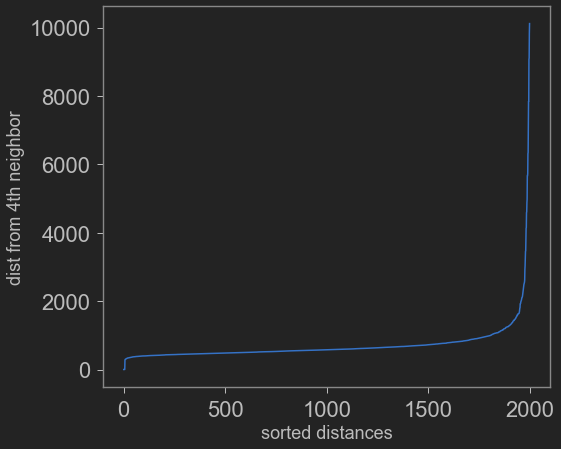

In [76]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [77]:
dbscan = DBSCAN(eps=1800, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1800, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [78]:
dblabels = dbscan.labels_

In [79]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([ 362, 1619,   10,    6,    3], dtype=int64))

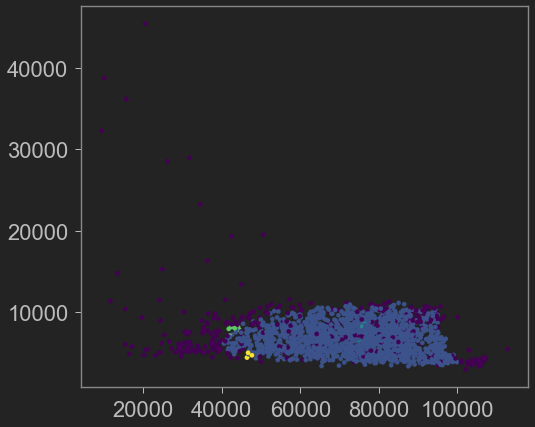

In [84]:
plt.scatter(df['VehOdo'], df['VehBCost'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [81]:
df['Label'] = dblabels
q = df.groupby("Label").mean()
q 

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost,AverageMMR,Size_class
Label,,,,,,,
-1,0.179764,4.213433,64178.262213,7902.457303,1721.313129,8356.292712,4.074729
0,0.143226,4.807227,73948.023397,6796.887470,1314.161192,7894.973434,3.429857
1,0.098895,3.747222,76111.071806,7714.905252,1155.668417,0.020662,4.834199
2,0.058845,2.000000,43041.364366,7887.240975,930.670124,9611.492721,2.000000
3,0.102564,6.666667,46947.874237,4723.852259,1107.925519,3448.930556,1.666667


In [177]:
c = df.groupby(['Label']).agg(lambda x:x.value_counts().index[0])
c.drop(['IsBadBuy','Auction', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost', 'AverageMMR', 'Size_class'],
      inplace=True, axis=1)
q['Row'] = q.index
c['Row'] = c.index
clusters = q.join(c.set_index('Row'), on='Row')
clusters.drop(['Row'], axis=1, inplace=True)
clusters.sort_values(by=['IsBadBuy'], ascending=False)

,IsBadBuy,Auction,VehicleAge,VehOdo,VehBCost,WarrantyCost,AverageMMR,Size_class,WheelType,Nationality
Label,,,,,,,,,,
-1,0.179764,0.794529,4.213433,64178.262213,7902.457303,1721.313129,8356.292712,4.074729,Alloy,AMERICAN
0,0.143226,0.794684,4.807227,73948.023397,6796.887470,1314.161192,7894.973434,3.429857,Alloy,AMERICAN
3,0.102564,0.839438,6.666667,46947.874237,4723.852259,1107.925519,3448.930556,1.666667,Covers,AMERICAN
1,0.098895,0.751332,3.747222,76111.071806,7714.905252,1155.668417,0.020662,4.834199,Alloy,AMERICAN
2,0.058845,0.898757,2.000000,43041.364366,7887.240975,930.670124,9611.492721,2.000000,Covers,AMERICAN
